In [66]:
from net import CifarNet

In [67]:
net = CifarNet()

In [68]:
import torch
import torchvision
import torchvision.transforms as transforms
tf = transforms.Compose([transforms.ToTensor()])
trainloader = torch.utils.data.DataLoader(torchvision.datasets.CIFAR10('data/', train=True, download=True, transform=tf), batch_size=64, shuffle=False)
print(f"Classes in CIFAR10 {trainloader.dataset.classes}")

Classes in CIFAR10 ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


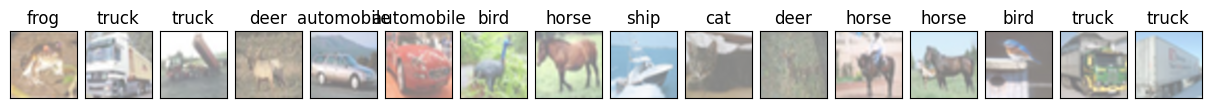

In [69]:
_, (cifar_samples, targets) = next(enumerate(trainloader))
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=1, ncols=16, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []}, constrained_layout=True)

for idx, ax in enumerate(axs.flat):
    ax.imshow(cifar_samples[idx,:,:,:].permute(1,2,0).numpy()*0.5 + 0.5, interpolation='spline16')
    ax.set_title(trainloader.dataset.classes[targets[idx]])
plt.show()

In [70]:
rand_values = torch.rand(3,3)
print(f"float tensor\n{rand_values}")

qvalues = torch.quantize_per_tensor(rand_values, scale=0.1, zero_point=64, dtype=torch.quint8)

print(f"quantized tensor (uint8)\n{qvalues}")

res = torch.dequantize(qvalues)

float tensor
tensor([[0.9837, 0.3760, 0.6808],
        [0.4168, 0.4965, 0.3266],
        [0.5747, 0.9180, 0.5483]])
quantized tensor (uint8)
tensor([[1.0000, 0.4000, 0.7000],
        [0.4000, 0.5000, 0.3000],
        [0.6000, 0.9000, 0.5000]], size=(3, 3), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.1, zero_point=64)


In [71]:
print(f"Tensor scale: {qvalues.q_scale()}, zero_point= {qvalues.q_zero_point()}")

Tensor scale: 0.1, zero_point= 64


In [27]:
def tensor_scale(input):
    return float(2*torch.max(torch.abs(torch.max(input)), torch.abs(torch.min(input))))/127.0

In [76]:
scale = tensor_scale(rand_values)
print(scale)
qvalues = torch.quantize_per_tensor(rand_values, scale=scale, zero_point=64, dtype=torch.quint8)
print(qvalues)

0.015490562897028886
tensor([[0.9914, 0.3718, 0.6816],
        [0.4182, 0.4957, 0.3253],
        [0.5732, 0.9139, 0.5422]], size=(3, 3), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.015490562897028886,
       zero_point=64)


In [78]:
res = torch.ops.quantized.add(qvalues, qvalues, scale=0.1, zero_point=64)

In [ ]:
a = torch.rand(100, 100)
b = torch.rand(100, 100)
scale_a = tensor_scale(a)
scale_b = tensor_scale(b)
c = a + b
scale_c = tensor_scale(c)
qvalues_a = torch.quantize_per_tensor(a, scale=scale_a, zero_point=64, dtype=torch.quint8)
qvalues_b = torch.quantize_per_tensor(b, scale=scale_b, zero_point=64, dtype=torch.quint8)
res = torch.ops.quantized.add(qvalues_a, qvalues_b, scale=tensor_scale(c), zero_point=64)
print(res)
print(c)

tensor([[0.7784, 1.0275, 1.0898,  ..., 0.9341, 0.3736, 0.4671],
        [0.7473, 0.4671, 1.1832,  ..., 0.2180, 0.8096, 1.4012],
        [0.9653, 0.5293, 1.5257,  ..., 0.7162, 1.3078, 1.2144],
        ...,
        [1.1209, 1.0587, 0.6539,  ..., 0.8407, 1.7437, 0.4671],
        [0.4982, 1.8682, 0.1557,  ..., 0.8096, 1.2455, 0.7473],
        [1.2144, 1.2766, 0.9341,  ..., 1.4635, 0.6539, 1.2144]],
       size=(100, 100), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.031137252417136364,
       zero_point=64)
tensor([[0.7830, 1.0338, 1.0858,  ..., 0.9365, 0.3829, 0.4549],
        [0.7414, 0.4565, 1.1995,  ..., 0.1953, 0.8243, 1.3884],
        [0.9753, 0.5386, 1.5261,  ..., 0.7354, 1.3217, 1.2213],
        ...,
        [1.1226, 1.0630, 0.6446,  ..., 0.8268, 1.7298, 0.4762],
        [0.4896, 1.8646, 0.1389,  ..., 0.8172, 1.2600, 0.7566],
        [1.2301, 1.2876, 0.9518,  ..., 1.4460, 0.6596, 1.2092]])
